# SVM
## Name: Nguyen Anh Hoang Phuc

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label
    """
    def __init__(self, num_iter=100, lr=0.01, kernel='linear', ganma=1, d=1, theta=0, threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.ganma = ganma 
        self.d = d
        self.theta = theta 

    def _kernel(self,x1,x2):
        """
        Compute kernel functions.
        Parameters
        ----------------
        X : The following forms of ndarray, shape (n_samples, n_features)
              Features of training data
        """
        if self.kernel == 'polly':
            self.ganma = 1
            self.theta = 1
            self.d = 2

        return (self.ganma*np.dot(x1,x2.T)+self.theta)**self.d

    def _lamda_update(self,X,y):
        for i in range(len(X)):
            total = 0
            for j in range(len(X)):
                total += self.lamda[j]*y[i]*y[j]*self._kernel(X[i],X[j])
            
            self.lamda[i] += self.lr*(1-total)

            if self.lamda[i] < 0:
                self.lamda[i] = 0  

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : 次の形のndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        # Set the initial value of lamda
        self.lamda = np.random.rand(len(X))

        # Unique value of y
        self.ylabel = np.unique(y)
        # Replace the label value of y with -1,1
        y = np.where(y==self.ylabel[0],-1,1)

        for i in range(self.iter):
            self._lamda_update(X,y)

            # Outputs the learning process when verbose is set to true.
            if self.verbose:
                print('iter_n: ', i, '; ', 
                      'lamda: ', self.lamda)
            
        # Extraction of suport vectors, specifications
        self.index_support_vectors = np.where(self.lamda > self.threshold)
        self.X_sv = X[self.lamda > self.threshold]
        self.n_support_vectors = len(self.X_sv)
        self.lam_sv = self.lamda[self.lamda > self.threshold]
        self.y_sv = y[self.lamda > self.threshold]

    def predict(self, X):
        """
        Estimate the label using the SVM classifier.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        y_pred = np.zeros(len(X))

        for i in range(len(X)):
            total = 0
            for j in range(self.n_support_vectors):
                total += self.lam_sv[j]*self.y_sv[j]*self._kernel(X[i],self.X_sv[j])

            if total >= 0:
                y_pred[i] = self.ylabel[1]
            else:
                y_pred[i] = self.ylabel[0]
              
        return y_pred


In [3]:
class ScratchSVMClassifierNumpy():
    """
    Scratch implementation of SVM classifier
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label
    """
    def __init__(self, num_iter=100, lr=0.01, kernel='linear', ganma=1, d=1, theta=0, threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.ganma = ganma 
        self.d = d
        self.theta = theta 

    def _kernel(self,x1,x2):
        """
        Compute kernel functions.
        Parameters
        ----------------
        X : The following forms of ndarray, shape (n_samples, n_features)
              Features of training data
        """
        if self.kernel == 'polly':
            self.ganma = 1
            self.theta = 1
            self.d = 2

        return (self.ganma*np.dot(x1,x2.T)+self.theta)**self.d

    def _lamda_update(self,X,y):
        for i in range(len(X)):
            self.lamda[i] += self.lr*(1-np.dot(self.lamda*y[i]*y.T, self._kernel(X[i],X)))
            self.lamda = np.where(self.lamda >= 0, self.lamda, 0)

            

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : 次の形のndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        # Set the initial value of lamda
        self.lamda = np.random.rand(len(X))

        # Unique value of y
        self.ylabel = np.unique(y)
        # Replace the label value of y with -1,1
        y = np.where(y==self.ylabel[0],-1,1)

        for i in range(self.iter):
            self._lamda_update(X,y)

            # Outputs the learning process when verbose is set to true.
            if self.verbose:
                print('iter_n: ', i, '; ', 
                      'lamda: ', self.lamda)
            
        # Extraction of suport vectors, specifications
        self.index_support_vectors = np.where(self.lamda > self.threshold)
        self.X_sv = X[self.lamda > self.threshold]
        self.n_support_vectors = len(self.X_sv)
        self.lam_sv = self.lamda[self.lamda > self.threshold]
        self.y_sv = y[self.lamda > self.threshold]

    def predict(self, X):
        """
        Estimate the label using the SVM classifier.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        y_pred = np.dot(self.lam_sv*self.y_sv,self._kernel(X,self.X_sv).T)
        return np.where(y_pred >= 0, self.ylabel[1],self.ylabel[0])

## Problem 1 Lagrange's steepest descent by the undetermined multiplier method
Lagrange's undetermined multiplier method is used for SVM learning. Prepare Lagrange multiplier $\lambda$ for the number of samples and update it by the following formula. Implement the method that performs this calculation in the ScratchSVMClassifier class.

$\lambda_{i}^{\text {new }}=\lambda_{i}+\alpha\left(1-\sum_{j=1}^{n} \lambda_{j} y_{i} y_{j} k\left(x_{i}, x_{j}\right)\right)$

Where $k(x_i, x_j)$ is a kernel function. For a linear kernel: Let's leave this part as an independent method so that it can correspond to other kernel functions.

$k\left(x_{i}, x_{j}\right)=x_{i}^{T} x_{j}$

As a condition, $\lambda_i >= 0$ must be satisfied for each update. If not, set $\lambda_i = 0$.

$i, j$: sample index

$\lambda_i^{new}$: Lagrange multiplier for i-th sample after update

$\lambda_i$: Lagrange multiplier of i-th sample before update

$\alpha$: learning rate

$\lambda_j$: Lagrange multiplier for the jth sample

$y_i$: Label for i-th sample

$y_j$: Label for the jth sample

$x_i$: Feature vector of i-th sample

$x_j$: Feature vector of jth sample

You will be calculating the relationship for one sample with all the samples.

In [4]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate((np.ones((int(n_samples/2))),
                    np.ones((int(n_samples/2)))*(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]

In [5]:
# Test with a small sample
x = sample1_X[20:40]
y = sample1_y[20:40]
print(x)
print(y)

[[-1.26658152e+00  1.97258945e+00]
 [-1.97638843e-02  2.54412654e+00]
 [ 8.60592217e-01 -2.46186096e+00]
 [ 1.18894987e+00 -8.80504418e-01]
 [-1.87575023e+00  1.56364771e+00]
 [ 2.46165485e+00 -2.00601784e+00]
 [-1.59848154e+00  1.10652913e+00]
 [ 3.98744618e+00 -1.36849117e-01]
 [-9.99508672e-01  2.50800932e+00]
 [ 2.17823407e+00 -1.06919332e+00]
 [ 4.37387107e-01  2.46038808e+00]
 [-1.46418280e+00  1.92088385e+00]
 [-1.50642737e+00  2.11125339e+00]
 [ 2.15843150e+00 -7.81996060e-01]
 [ 5.65369677e-01  3.79019610e+00]
 [-3.69047331e-03  2.72794750e+00]
 [-1.22189723e+00  1.92494695e+00]
 [-5.36952994e-01  2.27185396e+00]
 [ 2.13597636e+00 -1.03095228e+00]
 [ 2.91278930e+00 -1.22014572e+00]]
[ 1  1 -1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1]


In [6]:
# Generate a random number from 0 to 1 
lamda = np.random.rand(len(x))
lamda.reshape(-1,1)

array([[0.78078852],
       [0.64849689],
       [0.12651209],
       [0.86002657],
       [0.6180731 ],
       [0.9506601 ],
       [0.60180257],
       [0.81458512],
       [0.98738334],
       [0.78745161],
       [0.49138007],
       [0.58847251],
       [0.57324675],
       [0.04945666],
       [0.38529156],
       [0.42227615],
       [0.12963159],
       [0.04130635],
       [0.0047475 ],
       [0.35680508]])

In [7]:
# Manual Iteration
num_iter = 100
for _ in range(num_iter):
    for i in range(len(x)):
        total = 0
        for j in range(len(x)):
            total += lamda[j]*y[i]*y[j]*np.dot(x[i],x[j])
        lamda[i] += 0.01*(1-total)

        if lamda[i] < 0:
            lamda[i] = 0
    
print('lamda:\n',lamda.reshape(-1,1))

lamda:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.38451282]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.06141767]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [8]:
# Utilize numpy
xx = np.array([[1,2],
               [1,2],
               [2,4],
               [2,4]])
np.dot(xx[1],xx.T)

array([ 5,  5, 10, 10])

In [9]:
a=np.dot(x[0],x.T)
print(a)

[ 5.49533791  5.04354976 -5.94625117 -3.24277567  5.46022556 -7.07493618
  4.20733486 -5.32037279  6.21323194 -4.86799049  4.29934915  5.64362211
  6.07264925 -4.27638664  6.76041407  5.38579475  5.34476251  5.1615299
 -4.73903378 -6.09613169]


In [10]:
b=lamda*y[0]*y
print(b)

[ 0.          0.         -0.         -0.38451282  0.         -0.
  0.         -0.          0.         -0.          0.06141767  0.
  0.         -0.          0.          0.          0.          0.
 -0.         -0.        ]


In [11]:
a*b

array([0.        , 0.        , 0.        , 1.24688883, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.26405601, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [12]:
np.sum(a*b)

1.5109448409505661

In [13]:
np.dot(a,b)

1.5109448409505661

In [14]:
c = np.dot(x,x.T)
print(c.shape)

(20, 20)


In [15]:
d = lamda*y*y.T 
print(d.shape)

(20,)


In [16]:
np.dot(c,d)

array([-0.98283282, -0.48647284,  0.87803778,  0.74054115, -1.20103087,
        1.56755017, -0.98113589,  1.95569556, -0.95392817,  1.25475463,
       -0.24950104, -1.0687853 , -1.12491845,  1.19133334, -0.43683142,
       -0.51315079, -0.95227351, -0.6857692 ,  1.2271322 ,  1.63859785])

## Problem 2 Support vector determination
Calculated Lagrange multiplier λ

treats samples larger than the threshold set by as a support vector. You will need a support vector when estimating. Write the code to determine the support vector and keep it as an instance variable.

The threshold is a hyperparameter, but it is a good idea to start with about 1e-5. If you can output the number of support vectors, you can check whether the learning is done well.

In [17]:
# Extract samples with λ greater than a threshold value
threshold = 1e-5
spt_vec = x[lamda > threshold]
print(spt_vec)

[[ 1.18894987 -0.88050442]
 [ 0.43738711  2.46038808]]


In [18]:
# Get the index
spt_index = np.where(lamda > threshold)
print(spt_index)

(array([ 3, 10]),)


In [19]:
# Get the lamda and label values of the support vector
spt_lamda = lamda[lamda > 0]
spt_y = y[lamda > 0]
print(spt_lamda)
print(spt_y)

[0.38451282 0.06141767]
[-1  1]


## Problem 3 Estimation
At the time of estimation, the features of the data to be estimated and the features of the support vector are calculated by the kernel function. The computed f(x) sign is the classification result.

$f(x)=\sum_{n=1}^{N} \lambda_{n} y_{s v_{-} n} k\left(x, s_{n}\right)$

Consider the following equation where 
$x$: Feature vector of the data you want to estimate

$N$: Number of support vectors

Silhouette factorn:Support vector index

$λ_n$: $n$ Lagrange multiplier for the second support vector

$y_{s v_{n}}$ : nLabel of the second support vector

$k()$ : Kernel function

$s_n$ : n Features of the second support vector

In [20]:
# test data
x_test = x[0:5]
x_test

array([[-1.26658152,  1.97258945],
       [-0.01976388,  2.54412654],
       [ 0.86059222, -2.46186096],
       [ 1.18894987, -0.88050442],
       [-1.87575023,  1.56364771]])

In [21]:
for i in range(len(x_test)):
    total = 0
    for j in range(len(spt_vec)):
        total += spt_lamda[j]*spt_y[j]*np.dot(x_test[i],spt_vec[j])

    if total>0:
        print('f(x):{:.1f}, class:{}'.format(total,1))
    else:
        print('f(x):{:.1f}, class:{}'.format(total,-1))

f(x):1.5, class:1
f(x):1.3, class:1
f(x):-1.6, class:-1
f(x):-0.9, class:-1
f(x):1.6, class:1


## Problem 4 Learning and estimation

Learn and estimate the scratch implementation for the binary classification of Simple Dataset 1 prepared in the Sprint, an introduction to machine learning scratch.

Compare this with the scikit-learn implementation and see if it works correctly.

Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

<li> Try training and estimation with simple data 1

In [22]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples // 2))
X = np.concatenate([f0, f1])
y = np.concatenate((np.ones((int(n_samples/2))),
                    np.ones((int(n_samples/2)))*(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]

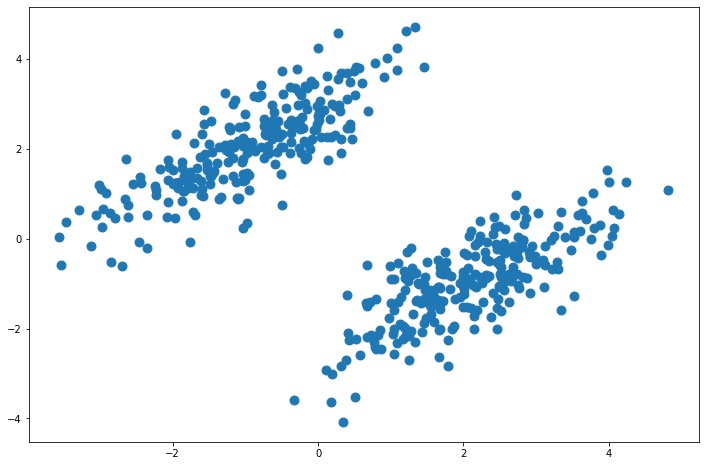

In [23]:
# Visulizing Simple Data 1
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(sample1_X[:,0],sample1_X[:,1],s=80)

In [24]:
from sklearn.model_selection import train_test_split
X = sample1_X 
y = sample1_y 

X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X, y, train_size=0.8, random_state=0)

print('X_train.shape: ', X_train1.shape)
print('y_train.shape: ', y_train1.shape)
print('X_valid.shape: ', X_valid1.shape)
print('y_valid.shape: ', y_valid1.shape)

X_train.shape:  (400, 2)
y_train.shape:  (400,)
X_valid.shape:  (100, 2)
y_valid.shape:  (100,)


In [25]:
# Train and estimate with scratch model
clf1 = ScratchSVMClassifier(num_iter=100, lr=0.01)

clf1.fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_valid1)

In [26]:
Show = True 
if Show:
    print("PRED: ", y_pred1)
    print("VALI: ", y_valid1)

PRED:  [-1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.
  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.]
VALI:  [-1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1
 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1
  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1
  1  1 -1  1]


In [27]:
# Evaluation index 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid1, y_pred1)
precision = precision_score(y_valid1, y_pred1)
recall = recall_score(y_valid1, y_pred1)
f1 = f1_score(y_valid1, y_pred1)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

accuracy:  1.0
precision:  1.0
recall:  1.0
f1:  1.0


<li> Scratch models are also being classified without problems

In [28]:
# Train and estimate with sklearn model
from sklearn.svm import SVC
clf_sk = SVC()

clf_sk.fit(X_train1, y_train1)

y_pred_sk = clf_sk.predict(X_valid1)

In [29]:
accuracy = accuracy_score(y_valid1, y_pred_sk)
precision = precision_score(y_valid1, y_pred_sk)
recall = recall_score(y_valid1, y_pred_sk)
f1 = f1_score(y_valid1, y_pred_sk)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

accuracy:  1.0
precision:  1.0
recall:  1.0
f1:  1.0


## Problem 5 Visualization of decision area
Visualise the decision area.

Show support vectors in different colors as in the example below

In [30]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,title='decision region',xlabel1='xlabel',ylabel1='ylabel',target_names=['versicolor','virginica']):
    #setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    #pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    #plot
    plt.title(title)
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)
    plt.contourf(mesh_f0,mesh_f1,y_pred,n_class-1,cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0,mesh_f1,y_pred,n_class-1,colors='y', linewidths=5,alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1],s=80,color=scatter_color[i],label=target_names[i],marker='o')
    patches = [mpatches.Patch(color=scatter_color[i],label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0],model.X_sv[:,1], color='yellow',s=80, label='support_vector')
    plt.legend(handles=patches)
    plt.legend()

Number of Suppor_vector: 9


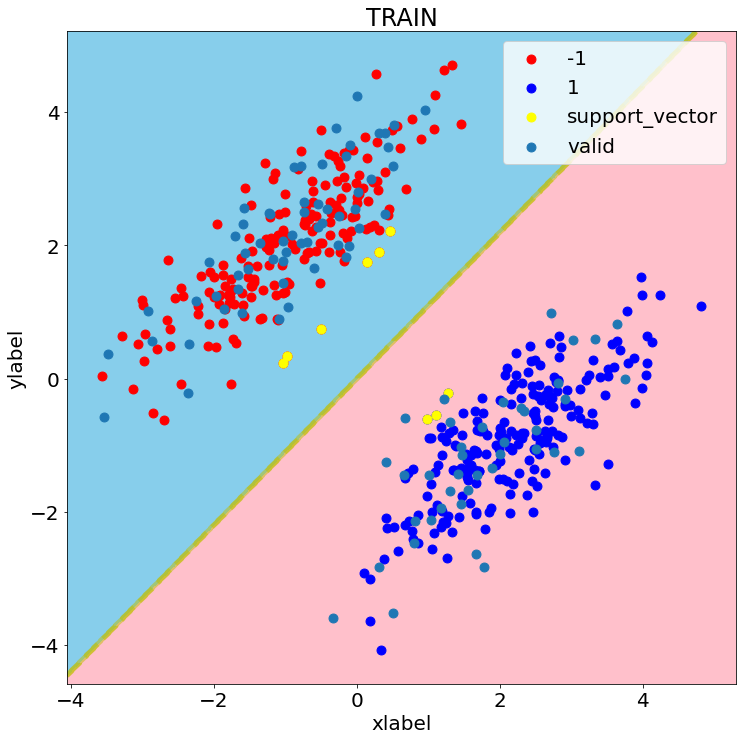

In [31]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print("Number of Suppor_vector:", clf1.n_support_vectors)
decision_region(X_train1,y_train1,clf1,title='TRAIN',target_names=['-1','1'])
plt.scatter(X_valid1[:,0],X_valid1[:,1],s=80, label='valid')
plt.legend()

<li> Also checked with a scratch SVM class for matrix calculations

In [32]:
# Train and estimate with scratch model
clfnp = ScratchSVMClassifierNumpy(num_iter=100, lr=0.01, threshold=1e-5)

clfnp.fit(X_train1, y_train1)
y_pred_clfnp = clfnp.predict(X_valid1)

In [33]:
accuracy = accuracy_score(y_valid1, y_pred_clfnp)
precision = precision_score(y_valid1, y_pred_clfnp)
recall = recall_score(y_valid1, y_pred_clfnp)
f1 = f1_score(y_valid1, y_pred_clfnp)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

accuracy:  1.0
precision:  1.0
recall:  1.0
f1:  1.0


Number of Suppor_vector: 9


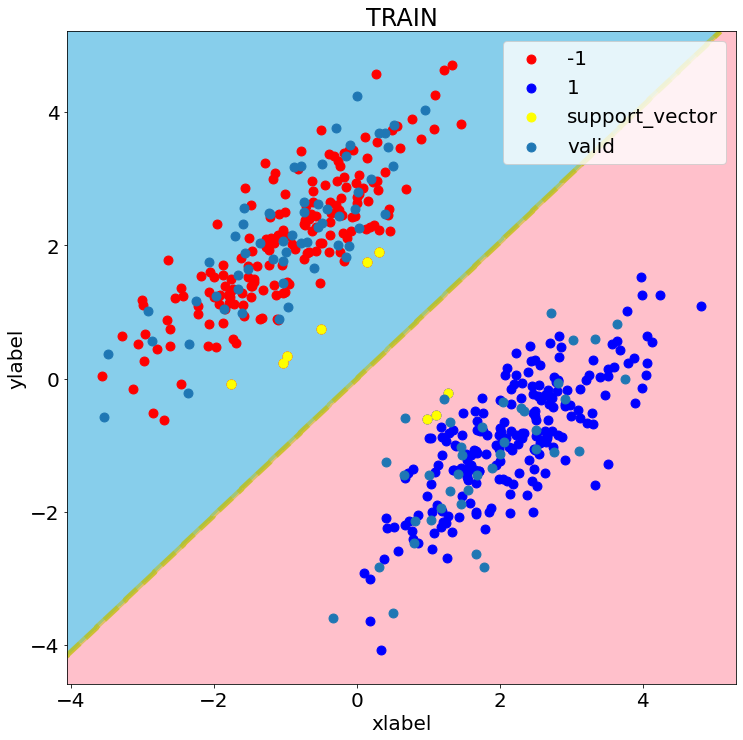

In [34]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print("Number of Suppor_vector:", clfnp.n_support_vectors)
decision_region(X_train1,y_train1,clfnp,title='TRAIN',target_names=['-1','1'])
plt.scatter(X_valid1[:,0],X_valid1[:,1],s=80, label='valid')
plt.legend()

## Problem 6 (Advance task) Creation of polynomial kernel function
The first implementation I created used a linear kernel. Let's also switch to the polynomial kernel.

"Linear kernel formula"

$k\left(x_{i}, x_{j}\right)=x_{i}^{T} x_{j}$

"Polynomial kernel formula"

$k\left(x_{i}, x_{j}\right)=\left(\gamma x_{i}^{T} x_{j}+\theta_{0}\right)^{d}$

$\gamma, \theta_{0}, d$ is a hyperparameter.

Linear kernel is $\gamma=1, \theta_{0}=0, d=1$ It can be said that it is equal to the polynomial kernel in the given case.

<li> Simple data 1 is trained and estimated using polynomial kernel

In [35]:
clf4 = ScratchSVMClassifierNumpy(kernel='polly',d=2)
clf4.fit(X_train1, y_train1)
y_pred4 = clf4.predict(X_valid1)

Number of Suppor_vector: 9


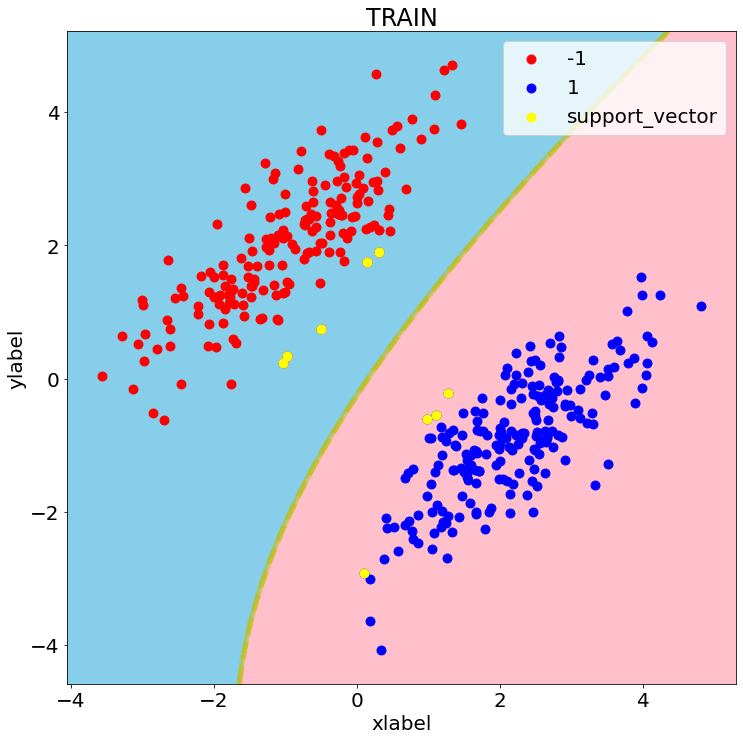

In [36]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print("Number of Suppor_vector:", clf4.n_support_vectors)
decision_region(X_train1,y_train1,clf4,title='TRAIN',target_names=['-1','1'])
# plt.scatter(X_valid1[:,0],X_valid1[:,1],s=80, label='valid')
plt.legend()

In [37]:
# Checking polynomial kernels
x = np.array([[2,1],
              [2,2]])
y = np.array([[3,8],
              [9,1]])
print('linear: \n', np.dot(x,y))
print('polly: \n', np.dot(x,y)**2)

linear: 
 [[15 17]
 [24 18]]
polly: 
 [[225 289]
 [576 324]]


### Classification of data distributed in a circle

In [38]:
# Circle class 1 data set
n = 300

rs = np.random.random(n)
r = 1.0
X1 = np.c_[r * np.cos(2*np.pi*rs), r * np.sin(2*np.pi*rs)]
Y1 = [-1 for _ in range(n)]

rs = np.random.random(n)
r = 2.0
X2 = np.c_[r * np.cos(2*np.pi*rs), r * np.sin(2*np.pi*rs)]
Y2 = [1 for _ in range(n)]

X = np.r_[X1, X2]
y = np.r_[Y1, Y2]

In [39]:
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X, y, train_size=0.8, random_state=0)
print('X_train.shape: ', X_train3.shape)
print('y_train.shape: ', y_train3.shape)
print('X_valid.shape: ', X_valid3.shape)
print('y_valid.shape: ', y_valid3.shape)

X_train.shape:  (480, 2)
y_train.shape:  (480,)
X_valid.shape:  (120, 2)
y_valid.shape:  (120,)


In [40]:
clf3 = ScratchSVMClassifierNumpy(kernel='polly',d=2)
clf3.fit(X_train3, y_train3)
y_pred3 = clf3.predict(X_valid3)

Number of Suppor_vector: 25


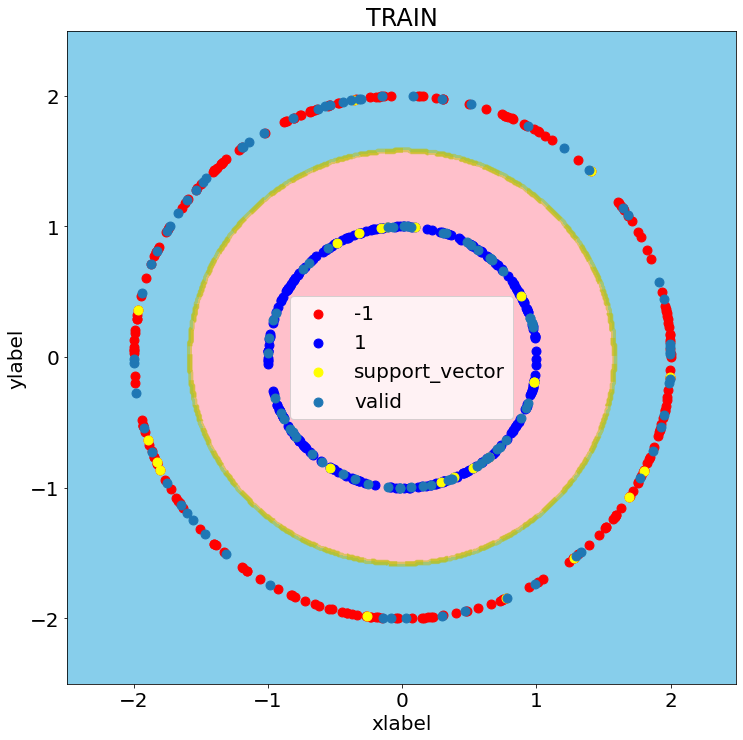

In [41]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print("Number of Suppor_vector:", clf3.n_support_vectors)
decision_region(X_train3,y_train3,clf3,title='TRAIN',target_names=['-1','1'])
plt.scatter(X_valid3[:,0],X_valid3[:,1],s=80, label='valid')
plt.legend()

In [42]:
# Compute feature vectors for polynomial kernels
from scipy.special import comb 

def poly_feature(x, d):
    z = np.zeros((x.shape[0], d+1))

    for i in range(d+1):
        # binomial theorem
        a = np.sqrt(comb(d, i, exact=True))
        z[:,i] = a * (x[:,0]**(d-i))*(x[:,1]**(i))
    return z

In [50]:
import pandas as pd

d = 2

columns = ['features '+str(i) for i in range(d+1)]
z = pd.DataFrame(poly_feature(X,d),columns=columns)
y = pd.DataFrame(y).rename(columns={0:'class'})
z = pd.concat([z,y],axis=1)

In [51]:
z

features 0  features 1  features 2  class
0      0.023743   -0.215312    0.976257     -1
1      0.415001   -0.696814    0.584999     -1
2      0.064207   -0.346653    0.935793     -1
3      0.118606    0.457249    0.881394     -1
4      0.236540   -0.600981    0.763460     -1
5      0.207648   -0.573638    0.792352     -1
6      0.001450    0.053815    0.998550     -1
7      0.240640   -0.604537    0.759360     -1
8      0.304700   -0.650935    0.695300     -1
9      0.099374   -0.423082    0.900626     -1
10     0.946835    0.317295    0.053165     -1
11     0.800024    0.565660    0.199976     -1
12     0.776077    0.589545    0.223923     -1
13     0.637153   -0.679984    0.362847     -1
14     0.450536    0.703638    0.549464     -1
15     0.010660   -0.145230    0.989340     -1
16     0.710514   -0.641379    0.289486     -1
17     0.004719   -0.096921    0.995281     -1
18     0.829494    0.531853    0.170506     -1
19     0.044701   -0.292243    0.955299     -1
20     0.963916   -0.263750    0.036084     -1
21     0.874788   -0.468047    0.125212     -1
22     0.008296    0.128273    0.991704     -1
23     0.508835    0.706996    0.491165     -1
24     0.788392    0.577633    0.211608     -1
25     0.045555   -0.294889    0.954445     -1
26     0.965379   -0.258543    0.034621     -1
27     0.041158    0.280942    0.958842     -1
28     0.588961    0.695825    0.411039     -1
29     0.114391    0.450124    0.885609     -1
..          ...         ...         ...    ...
570    1.679628   -2.791903    2.320372      1
571    0.668434    2.110418    3.331566      1
572    0.647568   -2.083712    3.352432      1
573    0.087880   -0.829214    3.912120      1
574    1.051333   -2.489992    2.948667      1
575    0.967791    2.422620    3.032209      1
576    0.221395   -1.293495    3.778605      1
577    0.592835    2.009919    3.407165      1
578    0.392856   -1.683502    3.607144      1
579    2.300285   -2.796365    1.699715      1
580    3.763198   -1.335015    0.236802      1
581    0.094689    0.859987    3.905311      1
582    0.753217   -2.211575    3.246783      1
583    3.998788    0.098468    0.001212      1
584    0.005325   -0.206261    3.994675      1
585    0.092695    0.851100    3.907305      1
586    2.667510    2.666245    1.332490      1
587    3.901261    0.877734    0.098739      1
588    1.025465   -2.469932    2.974535      1
589    0.586769    2.001388    3.413231      1
590    3.996411    0.169381    0.003589      1
591    0.399693   -1.696477    3.600307      1
592    3.081970   -2.378798    0.918030      1
593    0.025074   -0.446473    3.974926      1
594    3.998089    0.123609    0.001911      1
595    2.788060   -2.599601    1.211940      1
596    0.301309   -1.492950    3.698691      1
597    3.222904   -2.238082    0.777096      1
598    0.235357   -1.331192    3.764643      1
599    0.022370   -0.421856    3.977630      1

[600 rows x 4 columns]

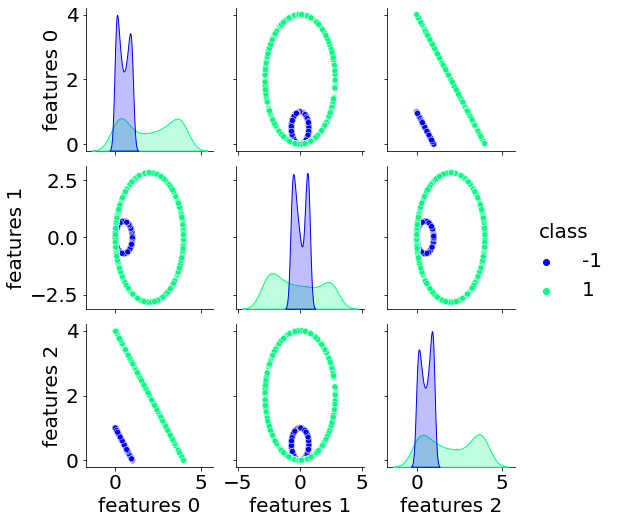

In [52]:
import seaborn as sns
sns.pairplot(z,hue='class',palette='winter')

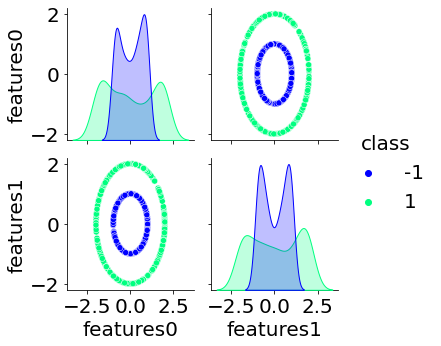

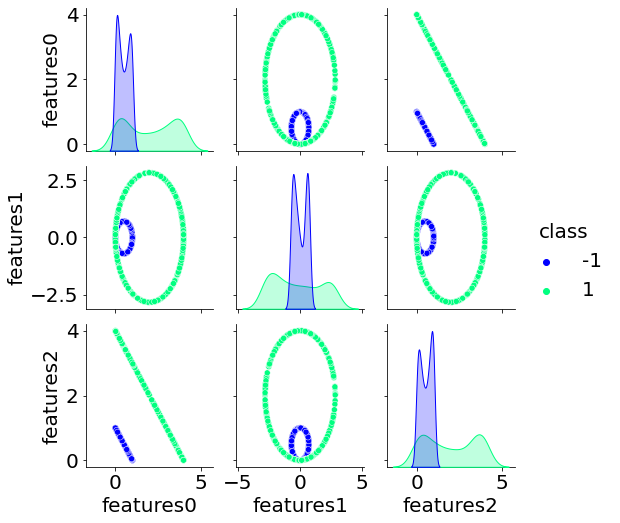

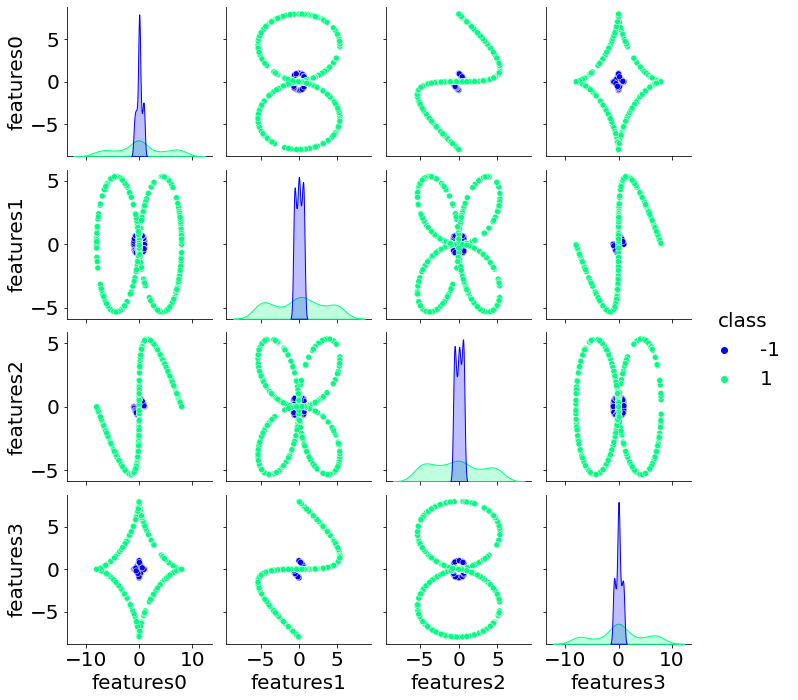

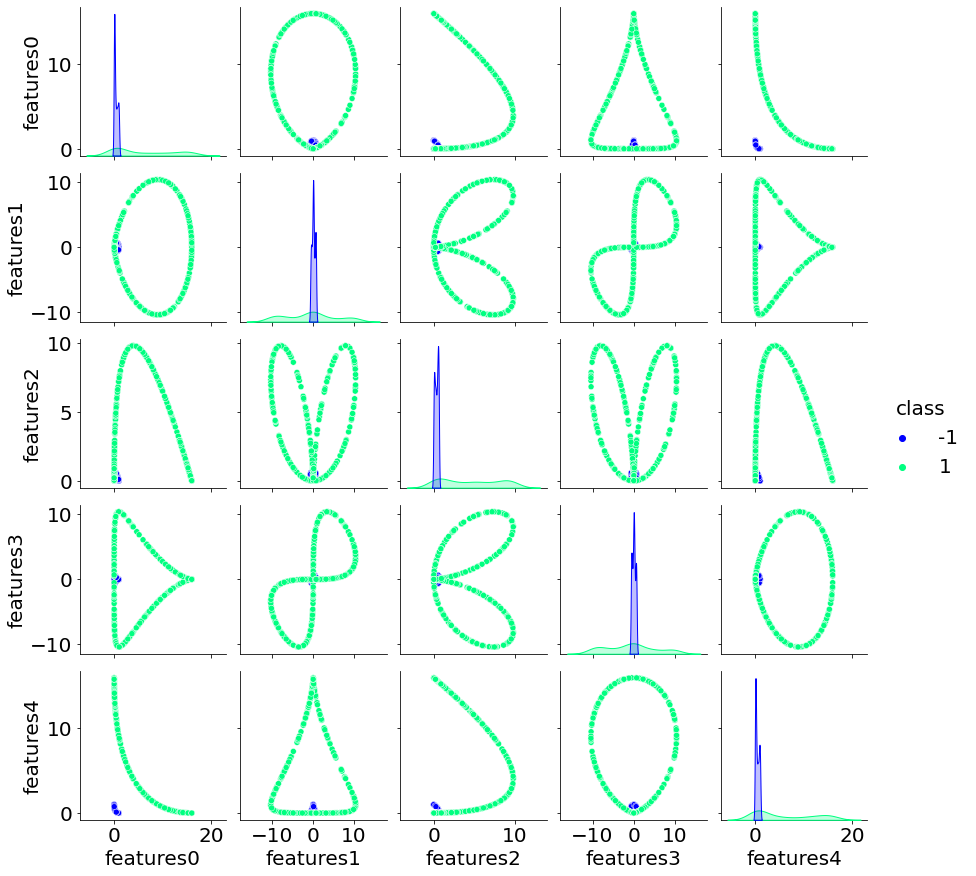

In [53]:
# Visualize 1 to 4 dimensions
for d in range(1,5):
    columns = ['features'+str(i) for i in range(d+1)]
    z = pd.DataFrame(poly_feature(X,d),columns=columns)
    y = pd.DataFrame(y).rename(columns={0:'class'})
    z = pd.concat([z,y],axis=1)
    
    sns.pairplot(z,hue='class',palette='winter')